In [30]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\tshankar\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [31]:
import numpy as np
import glob, os, copy
%matplotlib widget
import matplotlib.pyplot as plt
import sklearn.manifold as skl_manifold


In [12]:
cd  C:\Users\tshankar\Desktop\Research\Data\Results\IROS24_Submission\JointH2RDir\ZSet\E0_C0

C:\Users\tshankar\Desktop\Research\Data\Results\IROS24_Submission\JointH2RDir\ZSet\E0_C0


In [16]:
human_zs = np.load("LatentSet.npy")
human_task_list = np.load("TaskIDSet.npy")

In [17]:
cd  C:\Users\tshankar\Desktop\Research\Data\Results\IROS24_Submission\JointH2RDir\ZSet\E96000_C192000/

C:\Users\tshankar\Desktop\Research\Data\Results\IROS24_Submission\JointH2RDir\ZSet\E96000_C192000


In [18]:
robot_zs = np.load("LatentSet.npy")
robot_task_list = np.load("TaskIDSet.npy")

In [25]:
comp_task_list = ['Pouring+Stirring', 'DrawerOpening+PickPlace', 'BoxOpening+Pouring']
indiv_task_list = ['Pouring', 'BoxOpening', 'DrawerOpening', 'PickPlace', 'Stirring']

In [34]:
def get_embedding(latent_zs, tsne=None):

	perplexity = 30
	if tsne is None:
		tsne = skl_manifold.TSNE(n_components=2,random_state=0,perplexity=perplexity)		
	embedded_zs = tsne.fit_transform(latent_zs)
	return embedded_zs, tsne

In [37]:
robot_embedded_zs, robot_tsne = get_embedding(robot_zs)
human_embedded_zs, _ = get_embedding(human_zs, tsne=robot_tsne)

ValueError: x and y must be the same size

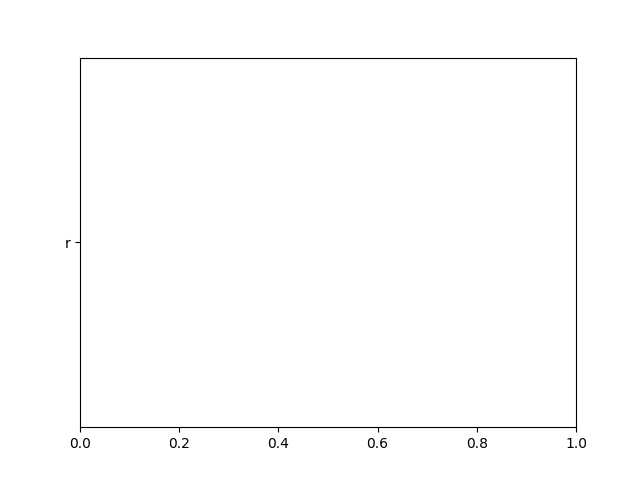

In [38]:
plt.scatter(robot_embedded_zs, 'r')
plt.scatter(human_embedded_zs, 'b')
plt.show()

In [ ]:
def get_plot():
    # For each compositional task, use a different marker. 
    # For each constituent individual task, one of the original 5 colors for each task for the skill. 
    
    # Create 3 lists for each compositional task, which stores indices of embedded_zs that are of that task.
    per_compositional_task_indices = {}
    individual_task_indices = []

    for k, v in enumerate(self.dataset.task_list):
        per_compositional_task_indices[v] = []
    
    # print("Embed in plot for composiitonal thingies. ")
    # embed()
            
    fig = plt.figure()
    ax = fig.gca()				

    for k in range(len(embedded_zs)):
        
        # For all embedded z's, add index of this z to the appropriate composiitonal task index list.
        per_compositional_task_indices[self.dataset.task_list[self.task_id_set[k]]].append(k)
        
        # For all embedded z's, get which individual task this segment came from. 		
        # The logic here is that if starting segment index < split index - 7, use the first index. Otherwise use the second index. 
        # index = 1-int(self.segment_indices_set[k] <= (self.task_split_indices_set[k]-7))
        index = int(self.segment_indices_set[k] > (self.task_split_indices_set[k]-7))

        # First get what compositional task this is. Then get the name of which individual task it is. 								
        individual_task_indices.append( self.dataset.individual_task_list.index( self.dataset.compositional_task_sets[ self.dataset.task_list[self.task_id_set[k]] ][index] ) )						

    # Now for each compositional task, plot things with a particular marker. 
    marker_list = ['o', 'D', 's']
    max_task = 4 

    for k, v in enumerate(self.dataset.task_list):			

        individual_task_indices_array = np.array(individual_task_indices)[np.array(per_compositional_task_indices[v])]
        colors = 0.1 + (0.75*(individual_task_indices_array/max_task))

        xs = embedded_zs[np.array(per_compositional_task_indices[v]),0]
        ys = embedded_zs[np.array(per_compositional_task_indices[v]),1]

        # ##############################
        # # PLOT OPTION 1 - markers 
        # ##############################		
        ax.scatter(xs, ys, c=colors, marker=marker_list[k], vmin=0, vmax=1, s=100, cmap='jet', edgecolors='black')			
        
        # ##############################
        # # # PLOT OPTION 2 - no markers, just bigger plots and colors
        # ##############################

        # # First plot with compositional task colors with bigger sizes. 
        # new_colors = 0.1 + 0.75*(k/2)*np.ones_like(colors)
        # ax.scatter(xs, ys, c=new_colors, vmin=0, vmax=1, marker=marker_list[k], s=200, cmap='jet', edgecolors='black')

        # # Then plot with task colors.
        # ax.scatter(xs, ys, c=colors, vmin=0, vmax=1, cmap='jet', edgecolors='black')

    # Title. 
    ax.set_title("{0}".format(title),fontdict={'fontsize':15})
    fig.canvas.draw()
    # Grab image.
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(int(height), int(width), 3)
    image = np.transpose(image, axes=[2,0,1])

    return image